In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_price.csv')


In [3]:
df.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.shape

(205, 26)

# CHANGE DATA TYPE 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [6]:
#normalized_losses , bore, stroke, horsepower, peak_rpm, price, we have to change this data type to int64 or float

In [7]:
cols=['normalized_losses'  ,'bore', 'stroke' ,'horsepower' ,'peak_rpm' ,'price']

In [8]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# TREATMENT NULL VALUES

In [10]:
df.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          0
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [11]:
df['normalized_losses'].fillna(df['normalized_losses'].mean(),inplace=True)
df['bore'].fillna(df['bore'].mean(),inplace=True)
df['stroke'].fillna(df['stroke'].mean(),inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].mean(),inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)

In [12]:
df.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# OUTLIER TREATMENT

In [13]:
df.describe()

,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


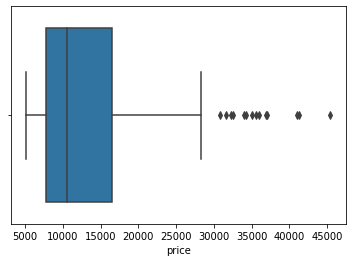

In [14]:
sns.boxplot(df['price'])

In [15]:
def remove_outliers(data,     col,     k=2):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]    
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape);return df1 


In [16]:
df.shape

(205, 26)

In [17]:
df_clean=remove_outliers(  df,   'price'  ,  k=2)

(191, 26)


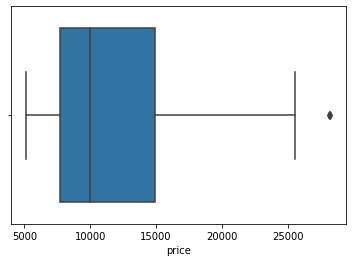

In [18]:
sns.boxplot(df_clean['price'])

In [19]:
df1.shape

(191, 26)

# LABEL ENCODING

In [20]:
import sklearn

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df_clean[df_clean.select_dtypes(include=['object']).columns]

,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,body_style,engine_type,num_of_cylinders,fuel_system
0,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,volvo,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,volvo,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,volvo,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,volvo,ohc,six,idi


In [23]:
df_clean[df_clean.select_dtypes(include=['object']).columns]=df_clean[df_clean.select_dtypes(include=['object']).columns].apply(le.fit_transform)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
df_clean

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,2,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,1,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,1,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,1,3,2,0,109.1,20,...,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,1,1,1,3,2,0,109.1,20,...,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,1,0,1,3,2,0,109.1,20,...,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,0,1,1,3,2,0,109.1,20,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [25]:
df_clean.shape

(191, 26)

# Collinearity

In [26]:
#constan feature
df_clean['engine_location'].value_counts()

0    191
Name: engine_location, dtype: int64

In [27]:
df_clean=df_clean.loc[:, (df_clean != df_clean.iloc[0]).any()]

In [28]:
df_clean.shape

(191, 25)

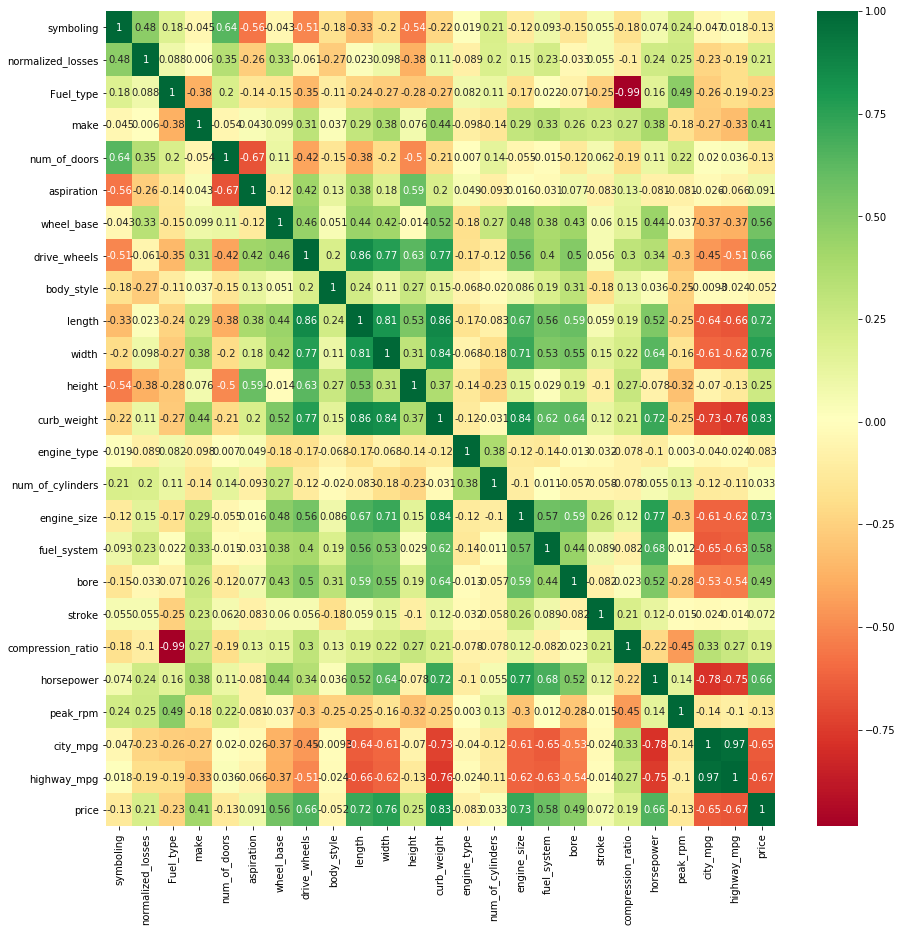

In [29]:
corrmat = df_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(df_clean, 0.9)
len(set(corr_features))

2

In [32]:
corr_features#drop this feature due to Multicollinearity

{'compression_ratio', 'highway_mpg'}

In [33]:
df_clean.drop(corr_features,axis=1,inplace=True);

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df_clean.shape

(191, 23)

# SAMPLING

In [35]:
df_clean

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,drive_wheels,body_style,length,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,horsepower,peak_rpm,city_mpg,price
0,3,122.0,1,0,2,0,2,88.6,0,168.8,...,0,2,130,5,3.47,2.68,111.0,5000.0,21,13495.0
1,3,122.0,1,0,2,0,2,88.6,0,168.8,...,0,2,130,5,3.47,2.68,111.0,5000.0,21,16500.0
2,1,122.0,1,0,2,2,2,94.5,0,171.2,...,5,3,152,5,2.68,3.47,154.0,5000.0,19,16500.0
3,2,164.0,1,0,1,3,1,99.8,1,176.6,...,3,2,109,5,3.19,3.40,102.0,5500.0,24,13950.0
4,2,164.0,1,0,1,3,0,99.4,1,176.6,...,3,1,136,5,3.19,3.40,115.0,5500.0,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,1,3,2,109.1,20,188.8,...,3,2,141,5,3.78,3.15,114.0,5400.0,23,16845.0
201,-1,95.0,1,1,1,3,2,109.1,20,188.8,...,3,2,141,5,3.78,3.15,160.0,5300.0,19,19045.0
202,-1,95.0,1,0,1,3,2,109.1,20,188.8,...,5,3,173,5,3.58,2.87,134.0,5500.0,18,21485.0
203,-1,95.0,0,1,1,3,2,109.1,20,188.8,...,3,3,145,3,3.01,3.40,106.0,4800.0,26,22470.0


In [36]:
df_x=df_clean.iloc[:,0:22]
df_y=df_clean['price']


In [37]:
df_x

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,drive_wheels,body_style,length,...,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,horsepower,peak_rpm,city_mpg
0,3,122.0,1,0,2,0,2,88.6,0,168.8,...,2548,0,2,130,5,3.47,2.68,111.0,5000.0,21
1,3,122.0,1,0,2,0,2,88.6,0,168.8,...,2548,0,2,130,5,3.47,2.68,111.0,5000.0,21
2,1,122.0,1,0,2,2,2,94.5,0,171.2,...,2823,5,3,152,5,2.68,3.47,154.0,5000.0,19
3,2,164.0,1,0,1,3,1,99.8,1,176.6,...,2337,3,2,109,5,3.19,3.40,102.0,5500.0,24
4,2,164.0,1,0,1,3,0,99.4,1,176.6,...,2824,3,1,136,5,3.19,3.40,115.0,5500.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,1,3,2,109.1,20,188.8,...,2952,3,2,141,5,3.78,3.15,114.0,5400.0,23
201,-1,95.0,1,1,1,3,2,109.1,20,188.8,...,3049,3,2,141,5,3.78,3.15,160.0,5300.0,19
202,-1,95.0,1,0,1,3,2,109.1,20,188.8,...,3012,5,3,173,5,3.58,2.87,134.0,5500.0,18
203,-1,95.0,0,1,1,3,2,109.1,20,188.8,...,3217,3,3,145,3,3.01,3.40,106.0,4800.0,26


In [38]:
df_y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 191, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
df_x_train , df_x_test  , df_y_train , df_y_test = train_test_split(df_x , df_y , test_size = .2,random_state=16)

# BILDING MODEL

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg=LinearRegression()

In [42]:
reg.fit(df_x_train,df_y_train)

LinearRegression()

In [43]:
pred_train=reg.predict(df_x_train)
pred_test=reg.predict(df_x_test)

In [44]:
reg.coef_

array([-5.30971103e+01,  2.28960752e+00, -5.84098181e+02,  2.27379722e+03,
       -2.68664924e+02, -5.41977117e+02,  1.17047075e+03, -3.26738910e+01,
       -1.76631338e+02,  2.59600680e+01,  5.99976111e+02,  2.53007070e+02,
        2.86880328e+00,  1.76673083e+01,  7.31167996e+02,  7.01321272e+01,
        3.81953489e+02, -1.72076208e+03, -3.11136560e+03, -2.48695688e+01,
        1.18965820e+00, -3.75966928e+00])

In [45]:
reg.intercept_

-46451.20722657924

# Model performance

In [46]:
from sklearn.metrics import r2_score#r2 for test
r2_score(df_y_test,pred_test)

0.8553633322700603

In [47]:
r2_score(df_y_train,pred_train)

0.7853864020973192

In [48]:
pred_train

array([14606.85668502, 14208.78645725,  9221.14747496, 18449.9242818 ,
       14834.64669725, 11105.15621065,  7070.34262887, 15779.0158631 ,
       13242.07037841,  6355.96626873, 10830.29299102, 12141.22180439,
        6751.464908  , 16437.68461428, 16663.51444437,  8026.92244632,
        8612.31271135, 15736.04225669, 11105.15621065,  7229.4560859 ,
        7689.16437874,  9846.20873312, 11502.46794998,  7421.29826857,
       11688.90716386,  8609.44033227, 14085.75385657,  8818.7641353 ,
       13959.19537296,  9569.61997787, 14539.53244164, 17325.18256105,
       22672.04628542, 13615.52428802,  8288.05375288, 10830.29299102,
       10839.53277047,  7762.24951171, 11178.48688245, 10253.43305319,
       20023.89532458, 19732.46583872,  7196.79061776,  9536.09333669,
       10402.45721392, 19884.08648031, 10839.53277047, 19756.57353701,
       12370.7433569 , 19006.42256511,  9417.57340403,  8886.7444028 ,
       11481.36852682, 11225.40886843, 14459.78755301, 14310.63853124,
      

In [49]:
#adjusted R2 for test
N=df_x_train.shape[0]
K=df_x_train.shape[1]
Rsquare=r2_score(df_y_test,pred_test)
AdjRSquare  =  1 - (1- Rsquare) * ( N -1) /  ( N -  K  -  1)

print(" Rsquare is(for test)     ---- >   "  , Rsquare)
print("Adjusted Rsquare is(for test)     ---- >   "  , AdjRSquare)


 Rsquare is(for test)     ---- >    0.8553633322700603
Adjusted Rsquare is(for test)     ---- >    0.8306966137424737


In [50]:
#adjusted R2 for train
N=df_x_train.shape[0]
K=df_x_train.shape[1]
Rsquare=r2_score(df_y_train,pred_train)
AdjRSquare  =  1 - (1- Rsquare) * ( N -1) /  ( N -  K  -  1)

print(" Rsquare is(for train)     ---- >   "  , Rsquare)
print("Adjusted Rsquare is(for train)     ---- >   "  , AdjRSquare)


 Rsquare is(for train)     ---- >    0.7853864020973192
Adjusted Rsquare is(for train)     ---- >    0.7487856334627536


In [51]:
error_test=df_y_test-pred_test

In [52]:
MSE=np.mean(np.square(error_test))
MSE

3403845.4671748225

In [53]:
RMSE=np.sqrt(MSE)
RMSE

1844.9513454763035

In [54]:
MAPE=np.mean(np.abs(error_test/df_y_test)*100)
MAPE

12.769232079574708

In [55]:
accuracy=100-MAPE
accuracy

87.2307679204253

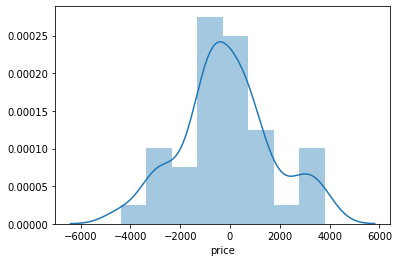

In [56]:
sns.distplot(error_test)

In [57]:
error_train=df_y_train-pred_train

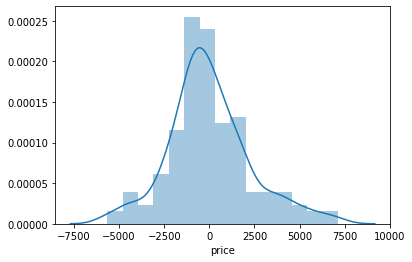

In [58]:
sns.distplot(error_train)

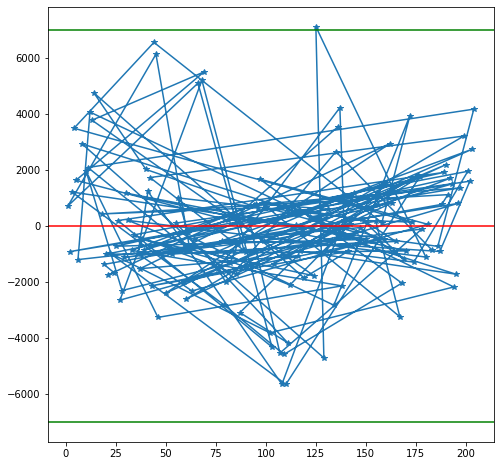

In [59]:
#Error terms are randomly distributed

plt.figure(figsize= (8 , 8))
plt.plot(   error_train , marker  =  "*")
plt.axhline(y  = np.mean(error_train)  , color = "r")
plt.axhline(y  = 7000  , color = "g")
plt.axhline(y  = -7000  , color = "g")


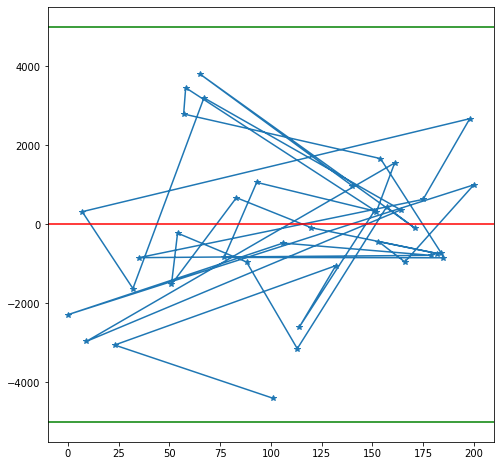

In [60]:
plt.figure(figsize= (8 , 8))
plt.plot(   error_test , marker  =  "*")
plt.axhline(y  = np.mean(error_train)  , color = "r")
plt.axhline(y  = 5000  , color = "g")
plt.axhline(y  = -5000  , color = "g")


Text(0, 0.5, 'Actual Test')

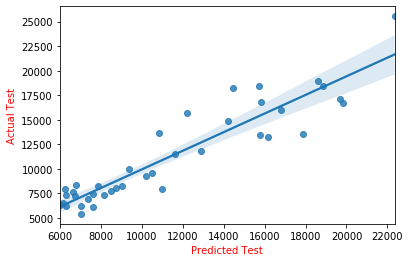

In [61]:
sns.regplot(pred_test,df_y_test)
plt.xlabel('Predicted Test',color='r')
plt.ylabel('Actual Test',color='r')

Text(0, 0.5, 'Actual Train')

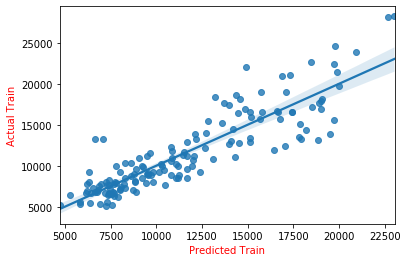

In [62]:
sns.regplot(pred_train,df_y_train)
plt.xlabel('Predicted Train',color='r')
plt.ylabel('Actual Train',color='r')

In [63]:
pred_actual_test=pd.DataFrame({"Predicted":pred_test, "Actual":df_y_test, "Error": error_test})
pred_actual_test

,Predicted,Actual,Error
140,6623.985405,7603.000000,979.014595
65,14476.156709,18280.000000,3803.843291
171,11646.101817,11549.000000,-97.101817
157,6759.615866,7198.000000,438.384134
113,19838.617731,16695.000000,-3143.617731
88,10230.615647,9279.000000,-951.615647
54,7617.470291,7395.000000,-222.470291
51,7612.881434,6095.000000,-1517.881434
83,14194.442441,14869.000000,674.557559
120,6315.634329,6229.000000,-86.634329
